In [3]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

### Compute some statistics about species data

In [4]:
## get species text length
speciesFiles = os.listdir("./final_data/species/")
binomialName = []
speciesKey = []
textLenght = []
for file in speciesFiles:
    with open("./final_data/species/" + file, "r") as fp:
        fileContent = json.load(fp)
        binomialName.append(fileContent["binomial_name"])
        speciesKey.append(fileContent["species_key"])
        textLenght.append(fileContent["text_length"])
species_data = pd.DataFrame(list(zip(speciesKey, binomialName, textLenght)),columns =["species_key", "binomial_name", "text_lenght"])

In [5]:
## get species taxonomy
df = pd.read_json("./processed_data/species_data.json", orient="records")
df = df.drop("scientific_name", axis=1).drop_duplicates()
species_data = df.join(species_data.set_index("species_key"), on="species_key", how="inner")
df = None

In [6]:
## get species number of occurences
df = pd.read_json("./processed_data/species_habitats_records.json", orient="records").drop_duplicates()
df = pd.DataFrame(df["species_key"].value_counts())
df.columns=["observations_count"]
species_data = species_data.join(df, on="species_key", how="inner")
df = None

In [7]:
len(pd.read_json("./processed_data/species_habitats_records.json", orient="records"))

1098584

In [8]:
len(species_data)

5198

In [9]:
species_data.head()

,kingdom,phylum,class,order,family,genus,species,species_key,binomial_name,text_lenght,observations_count
8,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Solidago,Solidago canadensis,5389029,Solidago canadensis,4796,1461
100522,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Robinia,Robinia pseudoacacia,5352251,Robinia pseudoacacia,23580,1294
133592,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Erigeron,Erigeron annuus,3117449,Erigeron annuus,3823,1182
320430,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Trifolium,Trifolium repens,5358748,Trifolium repens,14238,143
323989,Plantae,Tracheophyta,Magnoliopsida,Celastrales,Celastraceae,Euonymus,Euonymus europaeus,3169131,Euonymus europaeus,5787,118


In [10]:
## Overall text length and obsercations count distributions
species_data.describe()

,species_key,text_lenght,observations_count
count,5.198000e+03,5198.000000,5198.000000
mean,4.049562e+06,4366.070027,38.058484
std,2.255535e+06,7832.387447,82.797309
min,1.013335e+06,79.000000,1.000000
25%,2.494764e+06,780.000000,3.000000
50%,3.049742e+06,2217.000000,12.000000
75%,5.342410e+06,4540.750000,40.000000
max,1.215520e+07,184067.000000,2146.000000


In [11]:
## Number of documented species per kingdom
pd.DataFrame(species_data["kingdom"].value_counts())

,kingdom
Animalia,2300
Plantae,2140
Fungi,743
Chromista,7
Protozoa,5
Bacteria,3


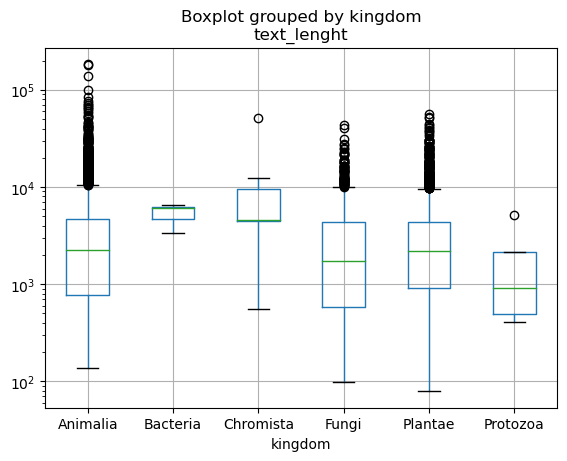

In [12]:
## Textlenght by kingom
ax = species_data.boxplot(column="text_lenght", by="kingdom")
ax.set_yscale("log")

In [13]:
## Total number of observations by kingdom
pd.DataFrame(species_data.groupby("kingdom")["observations_count"].sum())

,observations_count
kingdom,
Animalia,70459
Bacteria,3
Chromista,9
Fungi,5359
Plantae,121983
Protozoa,15


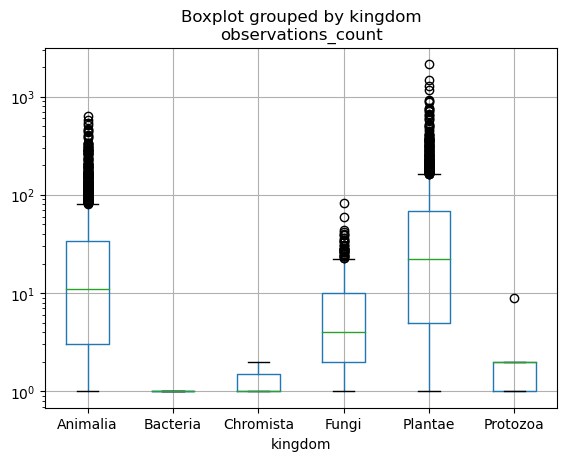

In [14]:
## Species number of observations distribution by kingdom
ax = species_data.boxplot(column="observations_count", by="kingdom")
ax.set_yscale("log")

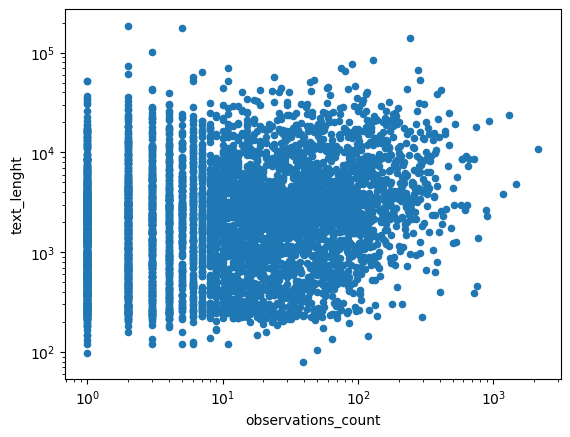

In [15]:
## Text length to observation count relation
ax = species_data.plot.scatter(x="observations_count", y="text_lenght")
ax.set_yscale("log")
ax.set_xscale("log")

### Compute statistics about inputs and targets

In [16]:
input_target_pairs = pd.read_json("./final_data/all_data.json", orient="records")
input_target_pairs.head(10)

,zone_id,maps_based_class,split,shape_area,species_key,species_count,species_based_class,num_classes
0,9,45,train,665918.930058,"[3032837, 3170807, 3105433, 2883073]",4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",19
1,10,43,train,2991.243434,[4299368],1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",21
2,13,66,train,230749.174683,[2891147],1,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",21
3,26,43,train,400775.100939,"[5137582, 7799370]",2,"[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...",17
4,29,5,train,101384.855230,"[8207244, 5352367, 3170807]",3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",19
5,37,43,train,10094.769110,[5405976],1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",21
6,38,66,train,132550.544072,[5410886],1,"[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",16
7,61,43,train,46156.868586,"[7270427, 8152305, 2482553, 5231240, 2494422]",5,"[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, ...",14
8,62,43,train,267678.647708,[5769191],1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...",2
9,65,44,train,91369.895171,[8207244],1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",21


In [17]:
input_target_pairs.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zone_id,maps_based_class,shape_area,species_count,num_classes
count,25963.000000,25963.000000,2.596300e+04,25963.000000,25963.000000
mean,48656.067789,29.700150,1.386739e+05,3.762778,14.553172
std,27950.578900,24.083893,5.124324e+05,3.286255,5.376938
min,9.000000,1.000000,8.114492e+00,1.000000,1.000000
10%,10365.600000,4.000000,4.086319e+03,1.000000,6.000000
20%,21574.800000,5.000000,9.328835e+03,1.000000,10.000000
30%,26934.000000,7.000000,1.732712e+04,1.000000,13.000000
40%,36129.400000,9.000000,2.960359e+04,2.000000,15.000000
50%,49333.000000,34.000000,4.654735e+04,2.000000,16.000000
60%,59435.200000,43.000000,7.053005e+04,3.000000,17.000000


In [18]:
## Fraction of the area covered by the dataset
import geopandas as gpd
study_area = gpd.read_file("./raw_data/study_area/study_area.shp")
total_area = study_area.area[0]
dataset_area = input_target_pairs["shape_area"].sum()
dataset_area
difference = total_area-dataset_area
fraction = dataset_area/total_area
fraction
print(f"Precentage of zones covered with observations : {fraction:.2%}")

/home/nicola/miniconda3/envs/pdm/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Precentage of zones covered with observations : 61.44%


Text(0, 0.5, 'Number of occurences')

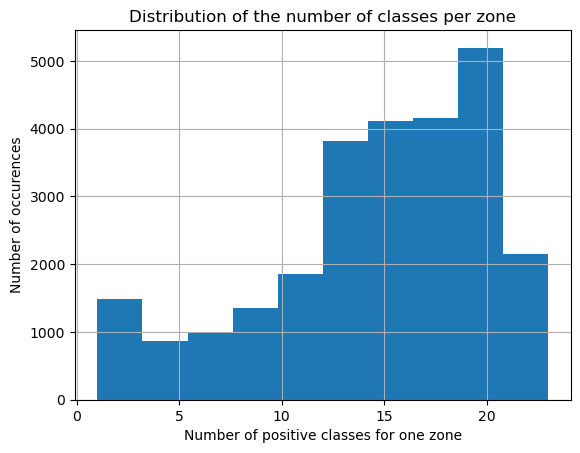

In [19]:
## Disribution of number of classes
plt.figure()
input_target_pairs["num_classes"].hist(bins=10)
plt.title("Distribution of the number of classes per zone")
plt.xlabel("Number of positive classes for one zone")
plt.ylabel("Number of occurences")

In [20]:
## Relationship between number of species and number of classes
corr = input_target_pairs["species_count"].corr(input_target_pairs["num_classes"])
print(f"The correlation between the number of species and the number of classes for a given zone is : {corr:.2%}")

The correlation between the number of species and the number of classes for a given zone is : -64.98%


In [21]:
## Occurence rate of classes accross samples
import torch
contingency = torch.tensor(input_target_pairs["species_based_class"].tolist())
occurence_rates = pd.DataFrame()
occurence_rates["class"] = pd.read_json("./final_data/habitats_keys.json", orient="records")["class"]
occurence_rates["rate"] = contingency.sum(dim=0).div(contingency.size(0)).tolist()
pd.DataFrame(occurence_rates.set_index("class").describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

,rate
count,23.000000
mean,0.632747
std,0.264817
min,0.061896
10%,0.218157
20%,0.371652
30%,0.565697
40%,0.654578
50%,0.703116
60%,0.784308


In [22]:
occurence_rates.set_index("class")

,rate
class,
1,0.503486
2,0.431114
3,0.850672
31,0.127412
32,0.332011
34,0.812618
4,0.906482
41,0.607172
42,0.779186


### Cooccurences of classes for species

In [23]:
import torch
import torch.nn.functional as F
import pandas as pd
level = "hybrid"
## Load data
species_habitats_records = pd.read_json("./processed_data/species_habitats_records.json", orient="records")
habitats_data = pd.read_json("./processed_data/habitats_data.json", orient="records").set_index("TypoCH_NUM")
## Merge sources
species_habitats_records = species_habitats_records.join(habitats_data[["Class","Group_","Type","Hybrid"]], on="TypoCH_NUM", how="left")
species_habitats_records = species_habitats_records.rename(columns={"Class": "class", "Group_":"group", "Type": "type", "Hybrid":"hybrid"})
## Get unique values of classes
unique_classes = species_habitats_records[level].unique()
## Sort "alphabetically"
unique_classes = list(map(str, unique_classes))
unique_classes.sort()
unique_classes = list(map(int, unique_classes))

In [24]:
len(habitats_data)

156

In [25]:
habitats_data.Group_.unique()

array([ 1, 11, 12,  2, 21, 22, 23, 24, 25,  3, 31, 32, 33, 34,  4, 40, 41,
       42, 43, 44, 45, 46,  5, 51, 52, 53, 54,  6, 60, 61, 62, 63, 64, 65,
       66,  7, 71, 72,  8, 81, 82,  9, 91, 92, 93, 94])

In [26]:
def get_onehots(entry, unique_classes):
    """Retrieve one_hot encodings"""
    x = [unique_classes.index(c) for c in entry]
    return F.one_hot(torch.tensor(x), num_classes=len(unique_classes)).sum(dim=0).tolist()

def get_species_classes(records, unique_classes):
    """Get one_hot encoded classes for each species"""
    species_classes = records.groupby("species_key")[level].unique().reset_index().rename(columns={level:"classes"})
    species_classes["classes_onehot"] = species_classes["classes"].apply(lambda x : get_onehots(x, unique_classes))
    return species_classes

In [27]:
species_habitats_records.head()

,zone_id,grid_id,TypoCH_NUM,species_key,shape_area,canton,split,class,group,type,hybrid
0,96603,1537,454,2891147,102800.130038,VD,train,4,45,454,45
1,95033,1625,625,3170040,15280.189843,VD,train,6,62,625,62
2,94466,1713,452,2891147,69785.151723,VD,train,4,45,452,45
3,94462,1713,453,5371685,104539.091134,VD,train,4,45,453,45
4,94901,1804,625,1703827,36810.089390,VD,train,6,62,625,62


In [28]:
get_species_classes(species_habitats_records, unique_classes).set_index("species_key")

,classes,classes_onehot
species_key,,
1013335,"[4, 3, 62, 66, 45, 41]","[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ..."
1013651,[45],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1035167,"[4, 7, 62, 66, 63, 34, 6, 9, 42, 8, 64, 45, 3]","[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, ..."
1035185,"[42, 61, 8, 62, 45, 4, 63, 6, 66, 34, 9, 64, 4...","[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, ..."
1035194,"[5, 7, 3, 45, 66, 9, 4, 34, 6, 43, 42, 44]","[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, ..."
...,...,...
11049437,[8],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11071158,"[62, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
11106107,"[8, 43, 5]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ..."


In [29]:
idx = get_species_classes(species_habitats_records, unique_classes).set_index("species_key").index
idx

Int64Index([ 1013335,  1013651,  1035167,  1035185,  1035194,  1035195,
             1035204,  1035208,  1035216,  1035231,
            ...
            10986555, 10994058, 11007246, 11033848, 11048070, 11049437,
            11071158, 11106107, 11986045, 12155203],
           dtype='int64', name='species_key', length=5198)

In [30]:
out = pd.DataFrame(get_species_classes(species_habitats_records, unique_classes).set_index("species_key")["classes_onehot"].tolist(), columns=unique_classes).astype(int)
out.index = idx
out.head()

,1,2,3,31,32,34,4,41,42,43,...,6,61,62,63,64,65,66,7,8,9
species_key,,,,,,,,,,,,,,,,,,,,,
1013335,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1013651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1035167,0,0,1,0,0,1,1,0,1,0,...,1,0,1,1,1,0,1,1,1,1
1035185,0,0,1,0,0,1,1,0,1,1,...,1,1,1,1,1,0,1,0,1,1
1035194,0,0,1,0,0,1,1,0,1,1,...,1,0,0,0,0,0,1,1,0,1


In [31]:
import numpy as np
cooccurence = out.T.dot(out)
cooccurence = cooccurence/len(idx)
#np.fill_diagonal(cooccurence.values, 0)

<Axes: title={'center': 'Cooccurences of classes accross species (fraction of total number of species) \n without auto cooccurence (diagonal is set to 0)'}>

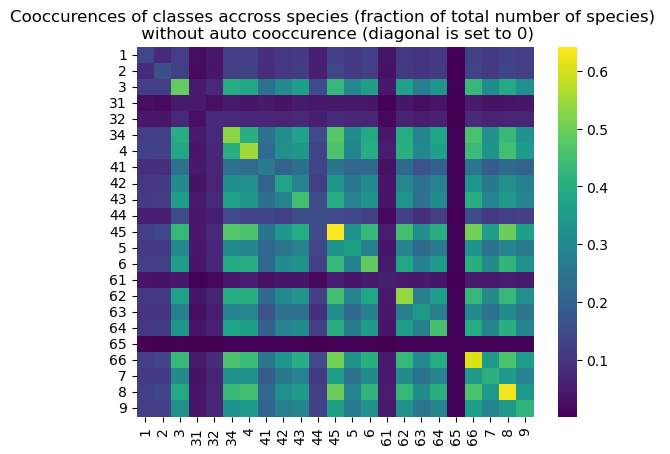

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
plt.title("Cooccurences of classes accross species (fraction of total number of species) \n without auto cooccurence (diagonal is set to 0)")
#plt.title("Cooccurences of classes accross species (fraction of total number of species) \n with auto cooccurence")
sns.heatmap(cooccurence, cmap="viridis")

### Common species stats

In [33]:
arr = []
cols = out.columns
for i in range(len(cols)):
    vals = []
    for j in range(len(cols)):
        if j==i:
            vals.append(0)
        else:
            vals.append((out[cols[i]].values*out[cols[j]].values).sum()/out[cols[i]].values.sum())
    arr.append(vals)
arr = np.array(arr)

Text(95.72222222222221, 0.5, 'class i')

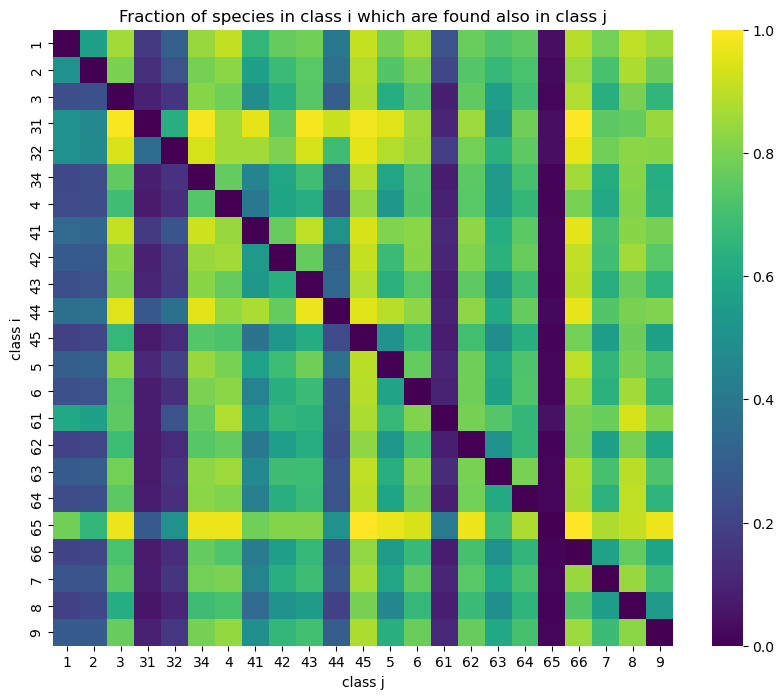

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title("Fraction of species in class i which are found also in class j")
sns.heatmap(arr, cmap="viridis", xticklabels=cols, yticklabels=cols)
plt.xlabel("class j")
plt.ylabel("class i")


In [35]:
habitats_data = pd.read_json("./processed_data/habitats_data.json", orient="records")
hybrid_classes = [1, 2, 3, 31, 32, 34, 4, 41, 42, 43, 44, 45, 5, 6, 61, 62, 63, 64, 65, 66, 7, 8, 9]
habitats_data["Hybrid"] = 0
for i in range(len(hybrid_classes)):
    if hybrid_classes[i]<10:
    	habitats_data.loc[habitats_data["Class"]==hybrid_classes[i],"Hybrid"] = hybrid_classes[i]
    else:
        habitats_data.loc[habitats_data["Group_"]==hybrid_classes[i],"Hybrid"] = hybrid_classes[i]
habitats_data.head(5)
#habitats_data.to_json("./processed_data/habitats_data.json", orient="records")

,TypoCH_NUM,TypoCH_DE,TypoCH_FR,TypoCH_IT,TypoCH_Sci,Class,Group_,Type,Source,Hybrid
0,1,1 Gewässer,1 Eaux libres,1 Ambienti acquatici,None,1,1,1,1,1
1,11,1.1 Stehende Gewässer,1.1 Eaux calmes,1.1 Acque ferme,None,1,11,11,1,1
2,12,1.2 Fliessgewässer,1.2 Eaux courantes,1.2 Acque correnti,None,1,12,12,1,1
3,2,2 Ufer und der Feuchtgebiete,2 Rivages et lieux humides,2 Rive e luoghi umidi,None,2,2,2,1,2
4,21,2.1 Ufer mit Vegetation,2.1 Rivages avec végétation,2.1 Rive con copertura vegetale,None,2,21,21,1,2


In [36]:
habitats_data[habitats_data["Group_"]==habitats_data["Type"]].TypoCH_FR

0                                          1 Eaux libres
1                                        1.1 Eaux calmes
2                                     1.2 Eaux courantes
3                             2 Rivages et lieux humides
4                            2.1 Rivages avec végétation
9                                         2.2 Bas-marais
17                                  2.3 Prairies humides
21                                  2.4 Tourbière bomées
23        2.5 Végétation annuelle temporairement inondée
27      3 Sable, gravier, pierre, pierre concassée, etc.
28                                   3.1 Glaciers, névés
29                             3.2 Alluvions et moraines
32                                           3.3 Eboulis
33                                  3.4 Parois rocheuses
34                                4 Pelouses et prairies
35                  4.0 Gazons et prairies artificielles
40                        4.1 Dalles rocheuses et lapiez
41                      4.2 Pel

In [37]:
habitats_data[habitats_data["Class"]==hybrid_classes[i]]["Hybrid"]

141    9
142    9
143    9
144    9
145    9
146    9
147    9
148    9
149    9
150    9
151    9
152    9
153    9
154    9
155    9
Name: Hybrid, dtype: int64

In [39]:
## Splits relative size
input_target_pairs["split"].value_counts()

train    15504
test      7934
val       2525
Name: split, dtype: int64

In [41]:
train = pd.read_json("/data/nicola/WSH/final_data/train_data.json", orient="records")

In [42]:
## Number of classes in splits
print(len(pd.read_json("/data/nicola/WSH/final_data/train_data.json", orient="records").maps_based_class.unique()))
print(len(pd.read_json("/data/nicola/WSH/final_data/val_data.json", orient="records").maps_based_class.unique()))
print(len(pd.read_json("/data/nicola/WSH/final_data/test_data.json", orient="records").maps_based_class.unique()))

23
22
23


In [40]:
## Available text lenght per zone and unique species number
subset = species_data[["speciesKey", "textLenght"]].set_index("speciesKey")
zones = input_target_pairs.drop_duplicates().join(subset, on="speciesKey", how="inner")
zones = zones.groupby(["zoneID","TypoCH_NUM","shapeArea","canton"]).agg({"speciesKey":"count","textLenght":"sum"}).reset_index()
zones = zones.rename(columns={"speciesKey":"speciesCount"})
zones.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

KeyError: "None of [Index(['speciesKey', 'textLenght'], dtype='object')] are in the [columns]"

In [ ]:
## Number of occurence of habitats
habitatsData = pd.read_json("./WikiSpeciesHabitats/habitatsData.json", orient="records")
subset = pd.DataFrame(zones.TypoCH_NUM.value_counts())
subset.columns = ["occurencesCount"]
habitatsData = habitatsData.join(subset, on="TypoCH_NUM", how="left")
habitatsData = habitatsData.fillna(0)
habitatsData.head(10)

,TypoCH_NUM,TypoCH_DE,TypoCH_FR,TypoCH_IT,TypoCH_Sci,Class,Group_,Type,Source,occurencesCount
0,1,1 Gewässer,1 Eaux libres,1 Ambienti acquatici,0,1,1,1,1,0.0
1,11,1.1 Stehende Gewässer,1.1 Eaux calmes,1.1 Acque ferme,0,1,11,11,1,168.0
2,12,1.2 Fliessgewässer,1.2 Eaux courantes,1.2 Acque correnti,0,1,12,12,1,488.0
3,2,2 Ufer und der Feuchtgebiete,2 Rivages et lieux humides,2 Rive e luoghi umidi,0,2,2,2,1,21.0
4,21,2.1 Ufer mit Vegetation,2.1 Rivages avec végétation,2.1 Rive con copertura vegetale,0,2,21,21,1,132.0
5,211,2.1.1 Moortümpelgesellschaft,2.1.1 Dépression inondée à utriculaires,2.1.1 Depressioni allagate con Erba-vescica,Sphagno-Utricularion,2,21,211,1,0.0
6,212,2.1.2 Röhricht,2.1.2 Roselière,2.1.2 Canneti,0,2,21,212,2,0.0
7,2121,2.1.2.1 Stillwasser-Röhricht,2.1.2.1 Roselière lacustre,2.1.2.1 Canneti lacustri,Phragmition,2,21,212,2,0.0
8,2122,2.1.2.2 Flussufer- und Landröhricht,2.1.2.2 Roselière terrestre,"2.1.2.2 Canneti terrestri, ripariali",Phalaridion,2,21,212,2,17.0
9,22,2.2 Flachmoore,2.2 Bas-marais,2.2 Paludi (torbiere basse),0,2,22,22,2,0.0


In [ ]:
## At the TypoCH_NUM level
habitatsData.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,TypoCH_NUM,Class,Group_,Type,Source,occurencesCount
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,557.794872,5.153846,51.474359,400.128205,3.724359,146.070513
std,888.226669,2.188397,23.863712,293.086483,2.948097,255.823531
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
10%,28.000000,2.000000,21.500000,28.000000,1.000000,0.000000
20%,60.000000,3.000000,25.000000,60.000000,2.000000,0.000000
30%,211.500000,4.000000,42.000000,152.500000,2.000000,0.000000
40%,401.000000,5.000000,45.000000,250.000000,2.000000,0.000000
50%,451.500000,5.000000,53.000000,432.500000,3.000000,6.000000
60%,543.000000,6.000000,61.000000,535.000000,3.000000,33.000000


In [ ]:
## At the Type level
pd.DataFrame(habitatsData.groupby("Type")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Type,occurencesCount
count,148.000000,148.000000
mean,403.297297,153.966216
std,296.006997,260.352467
min,1.000000,0.000000
10%,24.700000,0.000000
20%,53.400000,0.000000
30%,93.100000,0.000000
40%,251.800000,0.000000
50%,434.500000,13.500000
60%,537.200000,61.800000


In [ ]:
## At the Group level
pd.DataFrame(habitatsData.groupby("Group_")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Group_,occurencesCount
count,46.000000,46.000000
mean,42.195652,495.369565
std,27.922607,647.776826
min,1.000000,0.000000
10%,5.500000,0.000000
20%,11.000000,10.000000
30%,23.500000,44.500000
40%,33.000000,200.000000
50%,42.500000,278.000000
60%,51.000000,403.000000


In [ ]:
## At the Class level
pd.DataFrame(habitatsData.groupby("Class")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Class,occurencesCount
count,9.000000,9.000000
mean,5.000000,2531.888889
std,2.738613,2664.027001
min,1.000000,485.000000
10%,1.800000,621.800000
20%,2.600000,777.800000
30%,3.400000,880.200000
40%,4.200000,1017.800000
50%,5.000000,1441.000000
60%,5.800000,1997.800000
